In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

## Oscylator harmoniczny

Opisany jest układem równań:

$$
\frac{dp}{dt}=-kx \\
\frac{dx}{dt}=\frac{p}{m}
$$

Współczynniki:

In [104]:
m = 1.
k = 1.

Ustawienia solvera:

In [142]:
T = 50 #czas symulacji
N = 1000 #liczba itearacji
dt = T/N #wielkość kroku czasowego
time  = dt * np.arange(N)

Warunki początkowe:

In [143]:
x0 = 0.5
p0 = 0.5

## Rozwiązanie analityczne:

$$
x(t)=x(0)sin(\omega_{0}t)+\frac{v(0)}{\omega_{0}}cos(\omega_{0}t) \\
v(t)=\omega_{0}x(0)cos(\omega_{0}t)-\omega_{0}\frac{v(0)}{\omega_{0}}sin(\omega_{0}t)
$$

 - $\omega_{0} = \sqrt{\frac{k}{m}}$ częstość własna oscylatora 
 - $v(0)=\frac{p(0)}{m}$

In [144]:
omega = sqrt(k/m)
v0 = p0 / m
x_an = np.zeros_like(time)
v_an = np.zeros_like(time)
E_an = np.zeros_like(time)


for i in range(N):
    x_an[i] = x0 * sin(omega*time[i]) + v0 / omega * cos(omega*time[i])
    v_an[i] = omega * x0 * cos(omega*time[i]) - omega * v0 / omega * sin(omega*time[i])
    E_an[i] = 0.5 / m * (m*v_an[i]) * (m*v_an[i]) + 0.5 * k * x_an[i] * x_an[i]
    
A_an = []
t_Aan = []
for n in range(1, N -1):
    if ((x_an[n] > x_an[n-1]) and (x_an[n] > x_an[n+1])):
        A_an.append(x_an[n])
        t_Aan.append(time[n])

## Schemat explicit:
$$
p_{n+1}=P_{n}-kx_{n}*dt \\
x_{n+1}=x_{n}+\frac{p_{n}}{m}*dt
$$

In [145]:
x = np.zeros_like(time)
p = np.zeros_like(time)
E = np.zeros_like(time)

x[0] = x0
p[0] = p0

for n in range(N - 1):
    p[n+1] = p[n] - k * x[n] * dt 
    x[n+1] = x[n] + p[n] / m *dt 
    E[n+1] = 0.5 / m * p[n+1] * p[n+1] + 0.5 * k * x[n+1] * x[n+1] # energia
    

E[0] = E[1] # rozwiązuje problem z indeksami w energii

# Wyznaczam zmianę amplitudy:
A = []
t_A = []
for n in range(1, N -1):
    if ((x[n] > x[n-1]) and (x[n] > x[n+1])):
        A.append(x[n])
        t_A.append(time[n])

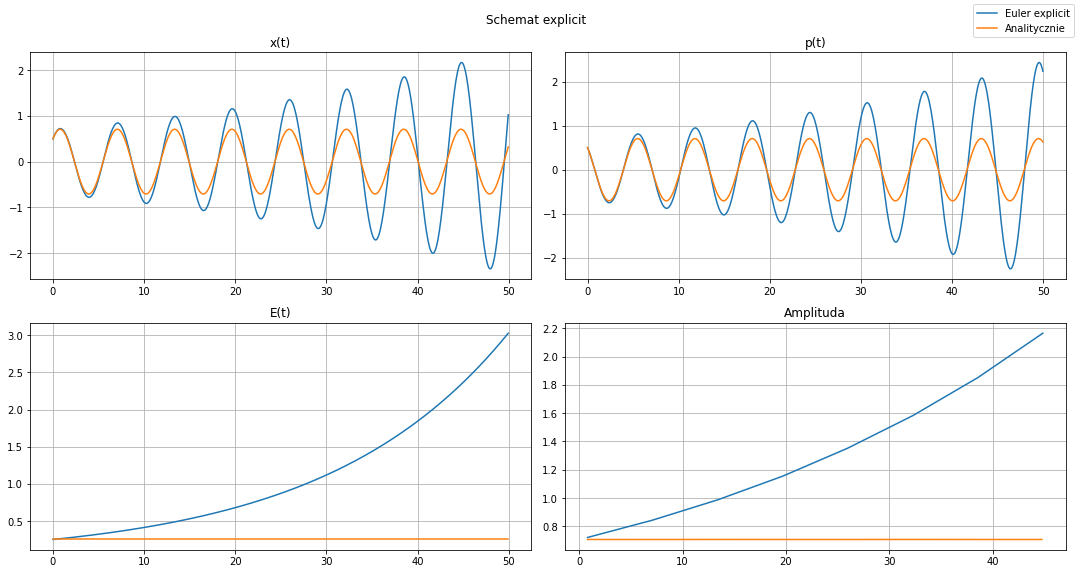

In [146]:
# Rysowanie wykresów
fig, axs = plt.subplots(2,2, figsize = (15, 8))
fig.suptitle("Schemat explicit")
axs[0, 0].plot(time, x)
axs[0, 0].plot(time, x_an)
axs[0, 0].set_title("x(t)")
axs[0, 0].grid(True)
axs[0, 1].plot(time, p)
axs[0, 1].plot(time, v_an*m)
axs[0, 1].set_title("p(t)")
axs[0, 1].grid(True)
axs[1, 0].plot(time, E)
axs[1, 0].plot(time, E_an)
axs[1, 0].set_title("E(t)")
axs[1, 0].grid(True)
axs[1, 1].plot(t_A, A)
axs[1, 1].plot(t_Aan, A_an)
axs[1, 1].set_title("Amplituda")
axs[1, 1].grid(True)
fig.tight_layout()
fig.legend(("Euler explicit", "Analitycznie"))

## Schemat implicit

$$
p_{n+1}-p_{n}=-kx_{n+1}*dt \\
x_{n+1}-x_{n}=\frac{p_{n+1}}{m}*dt
$$


In [150]:
x = np.zeros_like(time)
p = np.zeros_like(time)
E = np.zeros_like(time)

x[0] = x0
p[0] = p0

for n in range(N - 1):
    x[n+1] = (p[n] * dt / m + x[n])/(1 + k / m * dt * dt)
    p[n+1] = p[n] - k * x[n+1] * dt
    E[n+1] = 0.5 / m * p[n+1] * p[n+1] + 0.5 * k * x[n+1] * x[n+1] # energia
    

E[0] = E[1] # rozwiązuje problem z indeksami w energii

# Wyznaczam zmianę amplitudy:
A = []
t_A = []
for n in range(1, N -1):
    if ((x[n] > x[n-1]) and (x[n] > x[n+1])):
        A.append(x[n])
        t_A.append(time[n])

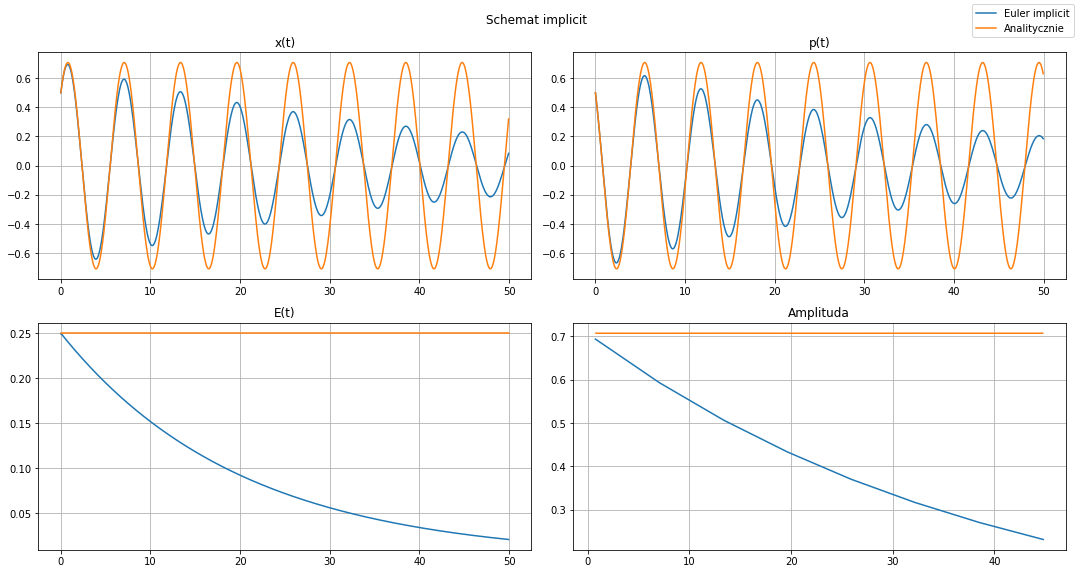

In [151]:
# Rysowanie wykresów
fig, axs = plt.subplots(2,2, figsize = (15, 8))
fig.suptitle("Schemat implicit")
axs[0, 0].plot(time, x)
axs[0, 0].plot(time, x_an)
axs[0, 0].set_title("x(t)")
axs[0, 0].grid(True)
axs[0, 1].plot(time, p)
axs[0, 1].plot(time, v_an*m)
axs[0, 1].set_title("p(t)")
axs[0, 1].grid(True)
axs[1, 0].plot(time, E)
axs[1, 0].plot(time, E_an)
axs[1, 0].set_title("E(t)")
axs[1, 0].grid(True)
axs[1, 1].plot(t_A, A)
axs[1, 1].plot(t_Aan, A_an)
axs[1, 1].set_title("Amplituda")
axs[1, 1].grid(True)
fig.tight_layout()
fig.legend(("Euler implicit", "Analitycznie"))

## Schemat semimplicit - wariant 1

$$
p_{n+1}-p_{n}=-kx_{n}*dt \\
x_{n+1}-x_{n}=\frac{p_{n+1}}{m}*dt
$$

In [154]:
x = np.zeros_like(time)
p = np.zeros_like(time)
E = np.zeros_like(time)

x[0] = x0
p[0] = p0

for n in range(N - 1):
    p[n+1] = p[n] - k * x[n] * dt
    x[n+1] = x[n] + p[n+1]/m *dt
    E[n+1] = 0.5 / m * p[n+1] * p[n+1] + 0.5 * k * x[n+1] * x[n+1] # energia
    

E[0] = E[1] # rozwiązuje problem z indeksami w energii

# Wyznaczam zmianę amplitudy:
A = []
t_A = []
for n in range(1, N -1):
    if ((x[n] > x[n-1]) and (x[n] > x[n+1])):
        A.append(x[n])
        t_A.append(time[n])

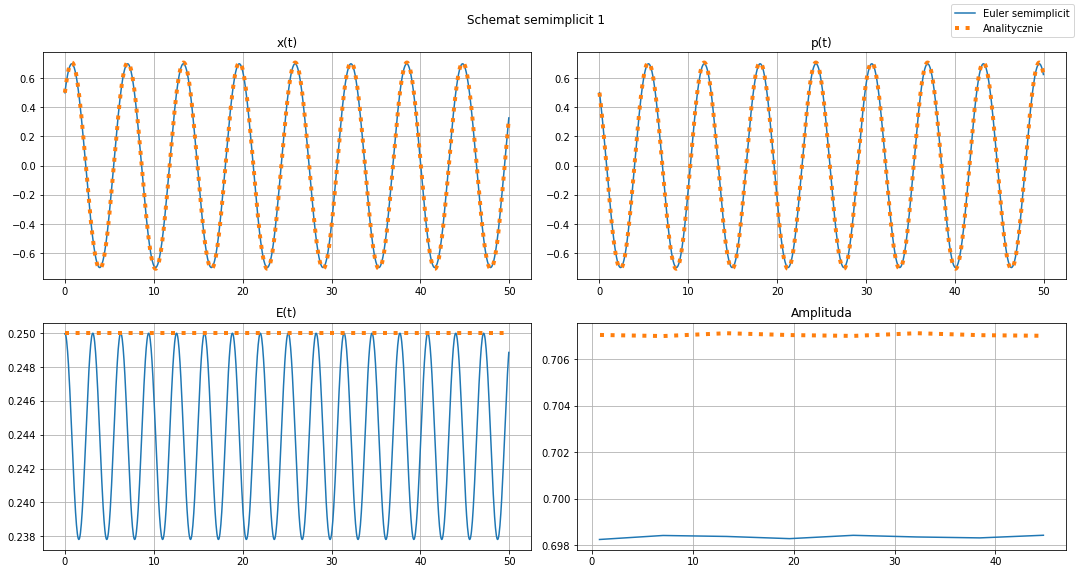

In [163]:
# Rysowanie wykresów
fig, axs = plt.subplots(2,2, figsize = (15, 8))
fig.suptitle("Schemat semimplicit 1")
axs[0, 0].plot(time, x)
axs[0, 0].plot(time, x_an, linestyle=":", linewidth = 4)
axs[0, 0].set_title("x(t)")
axs[0, 0].grid(True)
axs[0, 1].plot(time, p)
axs[0, 1].plot(time, v_an*m, linestyle=":", linewidth = 4)
axs[0, 1].set_title("p(t)")
axs[0, 1].grid(True)
axs[1, 0].plot(time, E)
axs[1, 0].plot(time, E_an, linestyle=":", linewidth = 4)
axs[1, 0].set_title("E(t)")
axs[1, 0].grid(True)
axs[1, 1].plot(t_A, A)
axs[1, 1].plot(t_Aan, A_an, linestyle=":", linewidth = 4)
axs[1, 1].set_title("Amplituda")
axs[1, 1].grid(True)
fig.tight_layout()
fig.legend(("Euler semimplicit", "Analitycznie"))

## Schemat semimplicit - wariant 2

$$
x_{n+1}-x_{n}=\frac{p_{n}}{m}*dt \\
p_{n+1}-p_{n}=-kx_{n+1}*dt 
$$

In [164]:
x = np.zeros_like(time)
p = np.zeros_like(time)
E = np.zeros_like(time)

x[0] = x0
p[0] = p0

for n in range(N - 1):
    x[n+1] = x[n] + p[n]/m *dt
    p[n+1] = p[n] - k * x[n+1] * dt
    E[n+1] = 0.5 / m * p[n+1] * p[n+1] + 0.5 * k * x[n+1] * x[n+1] # energia
    

E[0] = E[1] # rozwiązuje problem z indeksami w energii

# Wyznaczam zmianę amplitudy:
A = []
t_A = []
for n in range(1, N -1):
    if ((x[n] > x[n-1]) and (x[n] > x[n+1])):
        A.append(x[n])
        t_A.append(time[n])

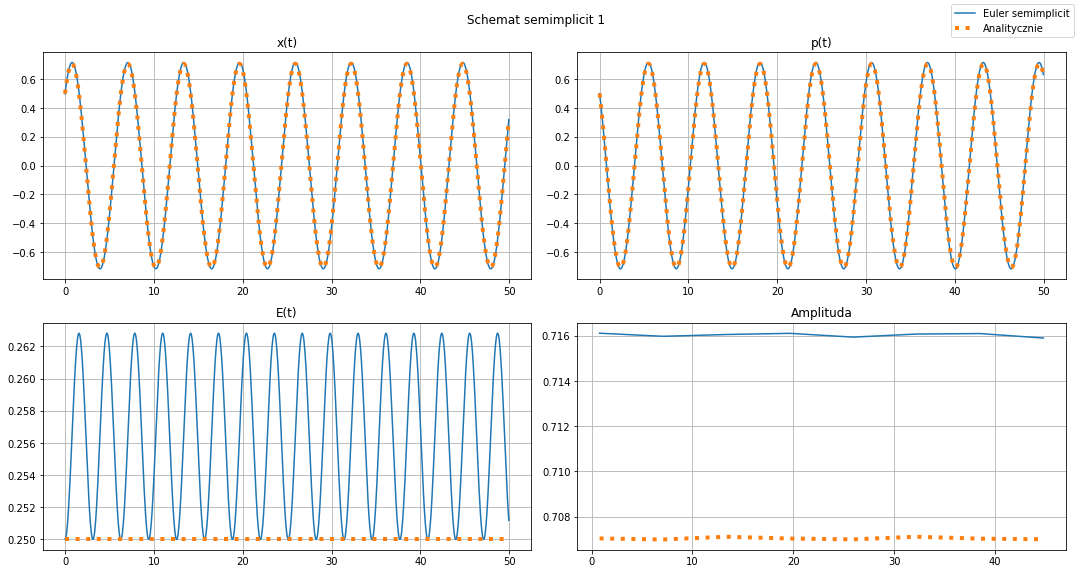

In [165]:
# Rysowanie wykresów
fig, axs = plt.subplots(2,2, figsize = (15, 8))
fig.suptitle("Schemat semimplicit 1")
axs[0, 0].plot(time, x)
axs[0, 0].plot(time, x_an, linestyle=":", linewidth = 4)
axs[0, 0].set_title("x(t)")
axs[0, 0].grid(True)
axs[0, 1].plot(time, p)
axs[0, 1].plot(time, v_an*m, linestyle=":", linewidth = 4)
axs[0, 1].set_title("p(t)")
axs[0, 1].grid(True)
axs[1, 0].plot(time, E)
axs[1, 0].plot(time, E_an, linestyle=":", linewidth = 4)
axs[1, 0].set_title("E(t)")
axs[1, 0].grid(True)
axs[1, 1].plot(t_A, A)
axs[1, 1].plot(t_Aan, A_an, linestyle=":", linewidth = 4)
axs[1, 1].set_title("Amplituda")
axs[1, 1].grid(True)
fig.tight_layout()
fig.legend(("Euler semimplicit", "Analitycznie"))

## Wnioski:


 - Rozwiązanie analityczne: energia uładu i amplituda drgań jest stała.
 - Schemat explicit: energia układu oraz amplituda drgań rosną.
 - Schemat implicit: energia układu oraz amplituda drgań maleją.
 - Schemat semimplicit: energia układu i amplituda drgań są niemal stałe - oscylują delikatnie wokół wartości rzeczywistych.